# Basic Analysis of Data

In just looking at the data with visualziation we learn a lot, but it's also easy as human to let our prior assumptions get in the way.  So a combination of both statistical tests and direct examination of the data is usually warranted to get a more complete understanding of what's happening. We'd like to be able to do statistical testing to see what the propability is that a difference is significant or could arise by chance

To do this, let's use the `scipy` packages, specifically the `stats` submodule <https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html>

In [2]:
from scipy import stats

There are many possible statistical tests, depending on the kind of data you have and the shape of the distributions of the data.  We are _not_ going to have the time to exhaustively examine them here, instead we will show a simple case or two using what is perhaps the simplest statistical test, _Student's t-test_.

The t-test is a type of hypothesis testing. In this case, we are trying to measure if the _null_ hypothesis $H_0$ i.e. that the means of the populations are equal.  You might say - "This is easy to measure - just take the mean of the samples and if they are the same, it's true, and if not, it's false!".  But it's not that simple - because you are _sampling_.  In the real world we only have a certain number of samples - and the samples often make a distribution.  So how far away the means need to be is dependent to some extent on _how many_ samples you have, and therefore how accurately you can estimate the population.

To demonstrate - let's consider some "random" distributions, one centered at 100 and one at 200

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
np.vstack((x,y))

array([[ 70.91053282, 145.13094593,  87.51485998,   3.05784131,
         73.74833158, 167.55444136,  61.65331237,  36.96143696,
        124.33805743, 121.69780207],
       [183.64358223, 195.92230455, 231.12730966, 223.65994665,
        115.8865978 , 198.12152435, 164.0120037 , 251.16090874,
        261.00131166, 178.39952866]])

In [54]:
dists=pd.DataFrame(np.vstack((np.random.normal(100,100,5), np.random.normal(200,100,5))).T, columns=['x', 'y']).melt()

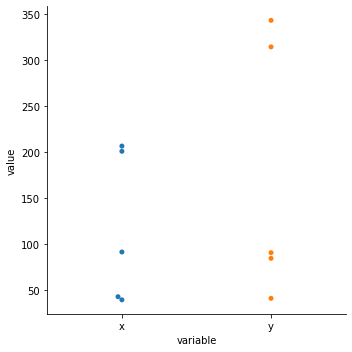

In [55]:
sns.catplot(data=dists, x="variable", y="value", kind="swarm")

Rnorm of two different norms with good variance

T-test, scipy

pca

In [1]:
lmfit

NameError: name 'lmfit' is not defined

A nice illustration of this is **Simpsons's paradox**